./logs/log_Jan08_14:32:26.txt ./logs/log_Jan08_00:28:52.txt


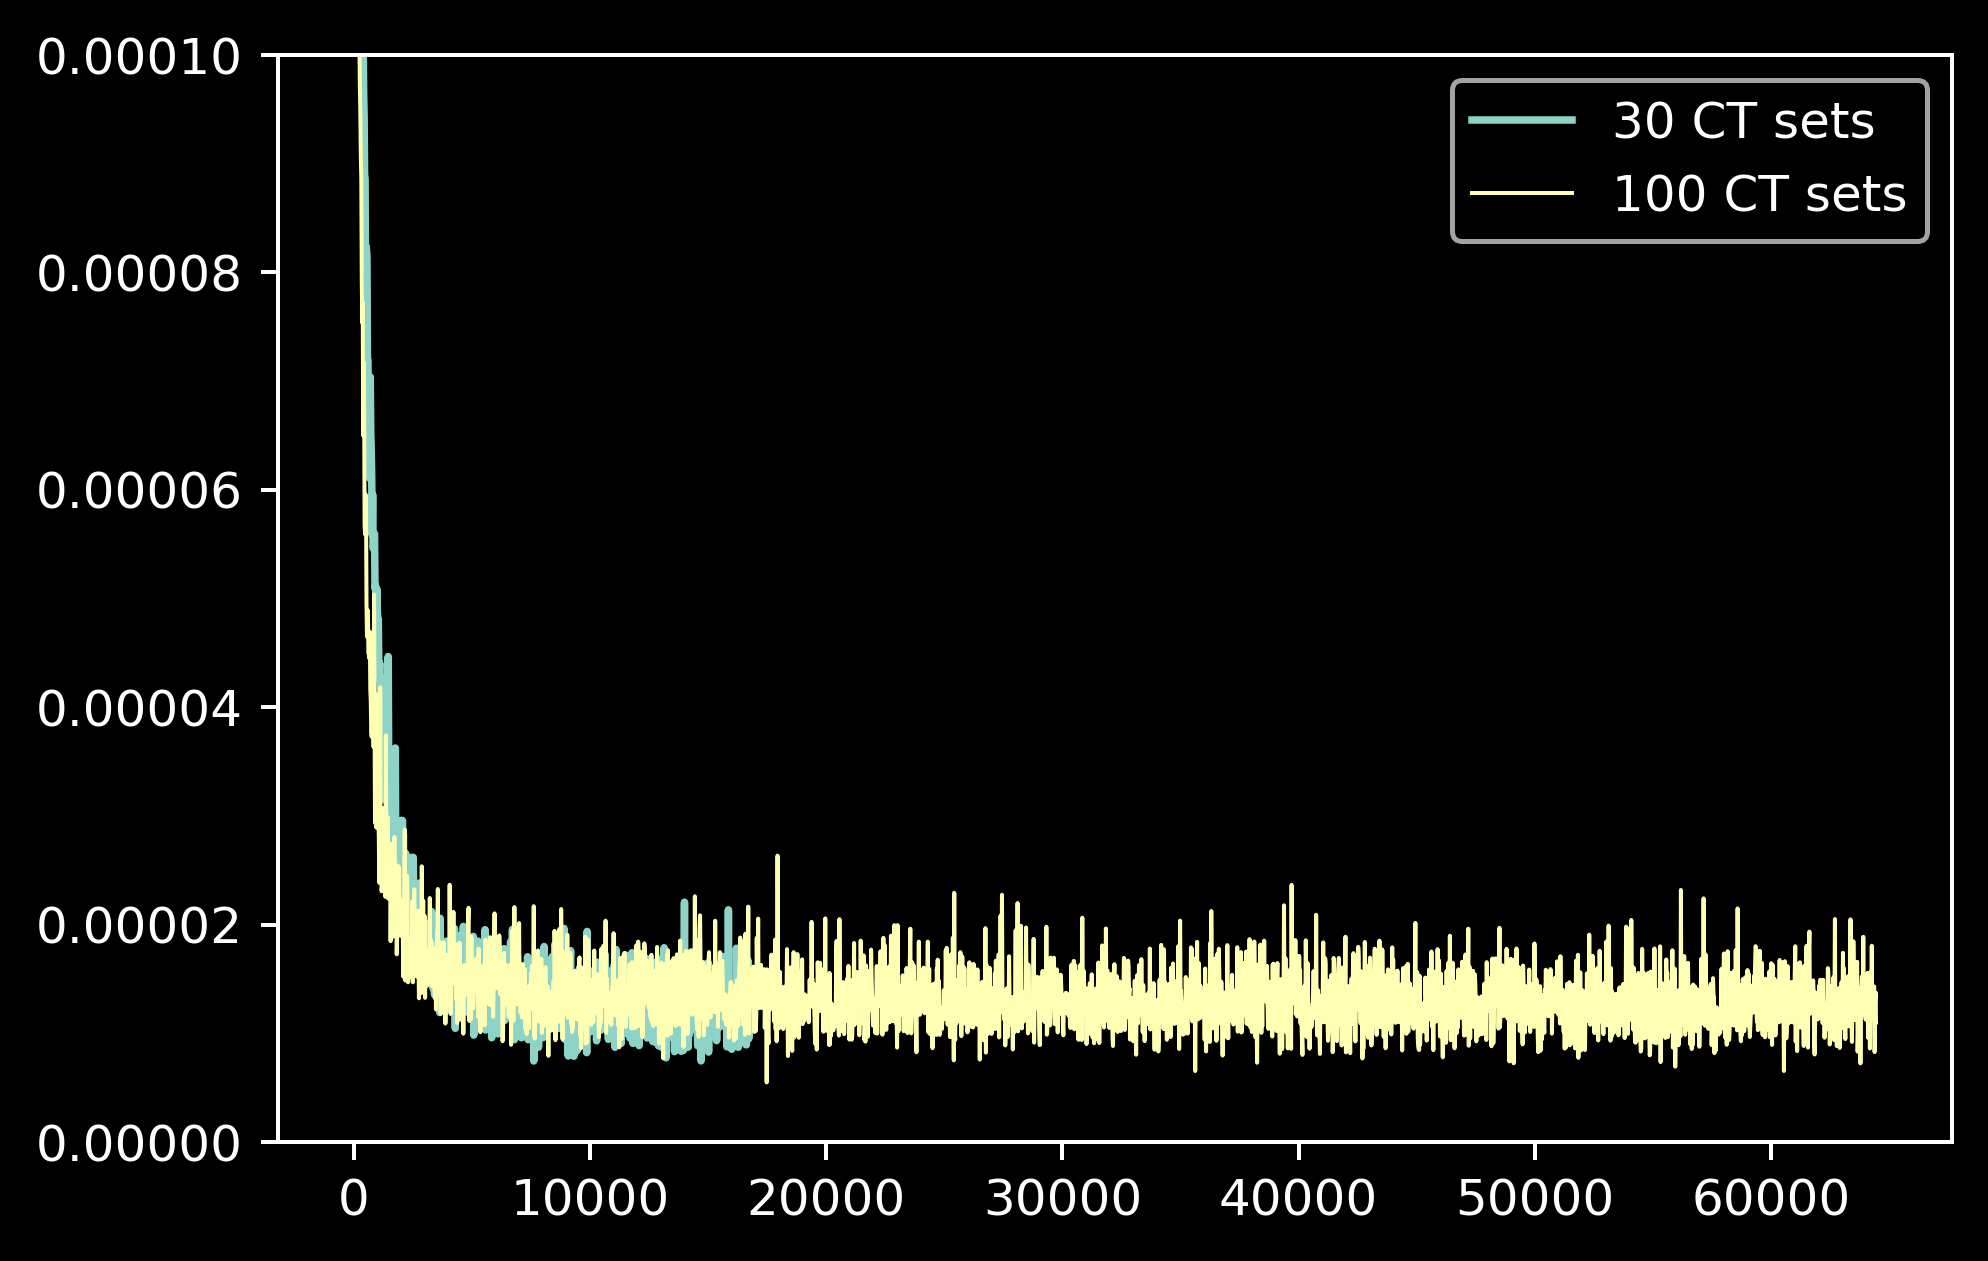

In [103]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import time

list_of_files = glob.glob('./logs/*')
s = sorted(list_of_files, key=os.path.getctime)
latest_file = s[len(s) - 1]
latest2_file = s[len(s) - 2]

print(latest_file, latest2_file)

# while 1:

plt.style.use('dark_background')
plt.figure(figsize=(6,4), dpi=360)
plt.title("Loss")
# plt.title("Resize factor")
plt.xlabel("Steps")
# plt.ylabel("Average pixel value difference")
plt.ylabel("Loss")
# plt.savefig("figs/resize.png")

df2 = pd.read_csv(latest2_file)
plt.plot(df2['STEP'], df2['LOSS'], label="30 CT sets")

df = pd.read_csv(latest_file)
plt.plot(df['STEP'], df['LOSS'], label="100 CT sets", linewidth=0.8)

plt.legend()
plt.ylim(0, 0.0001)

n = latest_file.split('/')[-1].split('.')[-2]
plt.savefig(f"./graphs/loss_{n}.png", facecolor='white', transparent=False)
time.sleep(1)

In [2]:
print("E")

E


In [3]:
! pip install parse

  Preparing metadata (setup.py) ... done
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24571 sha256=7263d77ab4a3e35a574a090769a0888f581b2b488d64d48c445e444617b0e814
  Stored in directory: /home/mfujita/.cache/pip/wheels/03/d9/92/db136347b5bcba7d271a3c042ce8c9c279e0ecd79173bb0a6e
Successfully built parse


KeyboardInterrupt: 

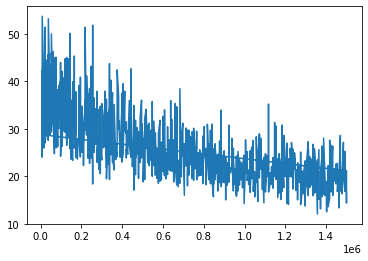

In [97]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import time
import parse
import pandas as pd

while 1:
    lines = []
    latest_file = './pix2pix/checkpoints/facades_pix2pix/loss_log.txt'
    with open(latest_file, 'r') as f:
        for line in f:
            lines.append(line)

    cols = ['epoch', 'iters', 'time', 'data', 'G_GAN', 'G_L1', 'D_real', 'D_fake']
    df = pd.DataFrame(columns=cols)

    for line in lines:
        if "=" in line:
            continue
        format_string = '(epoch: {:d}, iters: {:d}, time: {:3f}, data: {:3f}) G_GAN: {:3f} G_L1: {:3f} D_real: {:3f} D_fake: {:3f} \n'
        parsed = parse.parse(format_string, line)
        df.loc[len(df)] = list(parsed)

    plt.cla()
    plt.plot(df['epoch'] * 7500 + df['iters'], df['G_L1'])

    n = latest_file.split('/')[-1].split('.')[-2]
    plt.savefig(f"./graphs/loss2.png", facecolor='white', transparent=False)
    time.sleep(5)

In [6]:
import re
string = 'value is between 5 and 10'
m = re.match(r'value is between (.*) and (.*)', string)
print(m.group(1), m.group(2))

5 10
